In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np

from utilsIA import *
from processing import PipelineProcessText
from sklearn.metrics import confusion_matrix
import itertools


from keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
proce_text = PipelineProcessText()

In [3]:
df = pd.read_excel('BASE_NLP.xlsx', header=[0])
df

,DESCRIÇÃO,CLASSIFICAÇÃO
0,Papercut: Cliente solicita apoio para configur...,Instalação NDD Equip.
1,Software: NDD\nDescrição: Cliente informa que ...,Instalação NDD Equip.
2,Software: NDD\nDescrição: Residente informa qu...,Falhas de funcionalidades
3,Software: NDD\nDescrição: As cotas de impressã...,Erro Cotas
4,"NDD:ERRO DE AUTORIZAÇÃO, TODOS USUÁRIOS NÃO ES...",Parada de impressão
...,...,...
960,Software: NDD\nDescrição: Cliente informa erro...,bilhetagem/rateio
961,Software: NDD\nDescrição: Cliente informa que ...,Duvida
962,Software: NDD\nDescrição: Os usuários Mileny G...,Configuração
963,Software: NDD\nDescrição: Redidente informa qu...,Configuração


In [4]:
ProcessingData.showLabelsQtd(df, 'CLASSIFICAÇÃO')


Quantidade de itens nas 38 categorias:
Configuração                 451
Falha de funcionalidade       91
parada de impressão           64
Duvida                        62
bilhetagem/rateio             34
segurança                     29
duvida                        23
erro sincronismo              17
Dimensionamento               16
Segurança                     16
acesso                        15
atualização                   15
migração/mudança              13
instalação                    13
Lentidao                      11
Relatorio                     10
performance                    9
licença                        9
Instalação                     8
homologação                    8
Erro Sincronismo               8
Licença                        6
Desenvolvimento                6
bilhetagem/cota                5
configuração                   5
parada de digitalização        3
Atualização                    3
Treinamento                    3
Instalação NDD Equip.          2
Ace

In [5]:
df = ProcessingData.applyFunction(df, 'CLASSIFICAÇÃO', lambda x: x.upper())
ProcessingData.showLabelsQtd(df, 'CLASSIFICAÇÃO')


Quantidade de itens nas 27 categorias:
CONFIGURAÇÃO                 456
FALHA DE FUNCIONALIDADE       91
DUVIDA                        85
PARADA DE IMPRESSÃO           65
SEGURANÇA                     45
BILHETAGEM/RATEIO             34
ERRO SINCRONISMO              25
INSTALAÇÃO                    21
ATUALIZAÇÃO                   18
ACESSO                        17
DIMENSIONAMENTO               16
LICENÇA                       15
MIGRAÇÃO/MUDANÇA              13
RELATORIO                     11
LENTIDAO                      11
PERFORMANCE                    9
HOMOLOGAÇÃO                    8
DESENVOLVIMENTO                6
BILHETAGEM/COTA                5
TREINAMENTO                    4
PARADA DE DIGITALIZAÇÃO        3
INSTALAÇÃO NDD EQUIP.          2
FALHAS DE FUNCIONALIDADES      1
SERVIÇO                        1
MANUTENÇÃO                     1
ERRO COTAS                     1
INSTABILIDADE                  1
Name: CLASSIFICAÇÃO, dtype: int64

Um exemplo de cada categorias:

DE

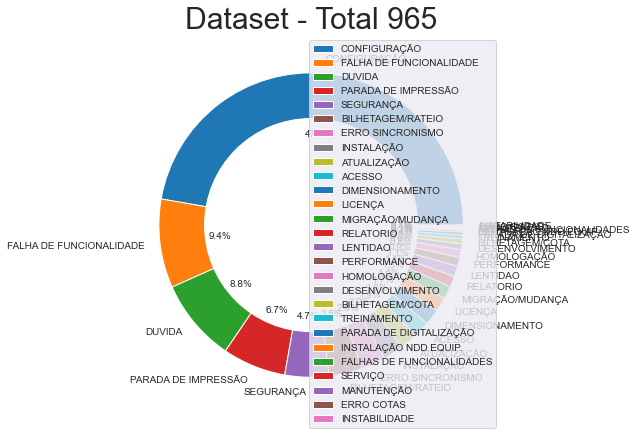

In [6]:
GraphDatas.labelsData(df['CLASSIFICAÇÃO'])

<h3>Apagar categorias com menos de 8 exemplos

In [7]:
df.drop(df.loc[df['CLASSIFICAÇÃO']=='FALHAS DE FUNCIONALIDADES'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='INSTALAÇÃO NDD EQUIP.'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='SERVIÇO'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='ERRO COTAS'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='MANUTENÇÃO'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='INSTABILIDADE'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='TREINAMENTO'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='PARADA DE DIGITALIZAÇÃO'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='BILHETAGEM/COTA'].index, inplace=True)
df.drop(df.loc[df['CLASSIFICAÇÃO']=='DESENVOLVIMENTO'].index, inplace=True)
df.reset_index(inplace=True)
df.drop('index', 1, inplace=True)
df

C:\Users\Edno\AppData\Local\Temp/ipykernel_12472/2044115105.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('index', 1, inplace=True)


,DESCRIÇÃO,CLASSIFICAÇÃO
0,"NDD:ERRO DE AUTORIZAÇÃO, TODOS USUÁRIOS NÃO ES...",PARADA DE IMPRESSÃO
1,Software: NDD\nDescrição: Cliente solicita con...,CONFIGURAÇÃO
2,Software: NDD\nDescrição: Cliente solicita inc...,CONFIGURAÇÃO
3,Software: Papercut\nDescrição: Cliente informa...,ERRO SINCRONISMO
4,Software: NDD\nDescrição: Cliente solicita apo...,CONFIGURAÇÃO
...,...,...
935,Software: NDD\nDescrição: Cliente informa erro...,BILHETAGEM/RATEIO
936,Software: NDD\nDescrição: Cliente informa que ...,DUVIDA
937,Software: NDD\nDescrição: Os usuários Mileny G...,CONFIGURAÇÃO
938,Software: NDD\nDescrição: Redidente informa qu...,CONFIGURAÇÃO


In [8]:
ProcessingData.showLabelsQtd(df, 'CLASSIFICAÇÃO')
df


Quantidade de itens nas 17 categorias:
CONFIGURAÇÃO               456
FALHA DE FUNCIONALIDADE     91
DUVIDA                      85
PARADA DE IMPRESSÃO         65
SEGURANÇA                   45
BILHETAGEM/RATEIO           34
ERRO SINCRONISMO            25
INSTALAÇÃO                  21
ATUALIZAÇÃO                 18
ACESSO                      17
DIMENSIONAMENTO             16
LICENÇA                     15
MIGRAÇÃO/MUDANÇA            13
LENTIDAO                    11
RELATORIO                   11
PERFORMANCE                  9
HOMOLOGAÇÃO                  8
Name: CLASSIFICAÇÃO, dtype: int64

Um exemplo de cada categorias:

DESCRIÇÃO
CLASSIFICAÇÃO


,DESCRIÇÃO,CLASSIFICAÇÃO
0,"NDD:ERRO DE AUTORIZAÇÃO, TODOS USUÁRIOS NÃO ES...",PARADA DE IMPRESSÃO
1,Software: NDD\nDescrição: Cliente solicita con...,CONFIGURAÇÃO
2,Software: NDD\nDescrição: Cliente solicita inc...,CONFIGURAÇÃO
3,Software: Papercut\nDescrição: Cliente informa...,ERRO SINCRONISMO
4,Software: NDD\nDescrição: Cliente solicita apo...,CONFIGURAÇÃO
...,...,...
935,Software: NDD\nDescrição: Cliente informa erro...,BILHETAGEM/RATEIO
936,Software: NDD\nDescrição: Cliente informa que ...,DUVIDA
937,Software: NDD\nDescrição: Os usuários Mileny G...,CONFIGURAÇÃO
938,Software: NDD\nDescrição: Redidente informa qu...,CONFIGURAÇÃO


In [11]:
ProcessingData.showLabelsQtd(df, 'CLASSIFICAÇÃO')
df


Quantidade de itens nas 17 categorias:
CONFIGURAÇÃO               456
FALHA DE FUNCIONALIDADE     91
DUVIDA                      85
PARADA DE IMPRESSÃO         65
SEGURANÇA                   45
BILHETAGEM/RATEIO           34
ERRO SINCRONISMO            25
INSTALAÇÃO                  21
ATUALIZAÇÃO                 18
ACESSO                      17
DIMENSIONAMENTO             16
LICENÇA                     15
MIGRAÇÃO/MUDANÇA            13
LENTIDAO                    11
RELATORIO                   11
PERFORMANCE                  9
HOMOLOGAÇÃO                  8
Name: CLASSIFICAÇÃO, dtype: int64

Um exemplo de cada categorias:

DESCRIÇÃO
CLASSIFICAÇÃO


,DESCRIÇÃO,CLASSIFICAÇÃO
0,"NDD:ERRO DE AUTORIZAÇÃO, TODOS USUÁRIOS NÃO ES...",PARADA DE IMPRESSÃO
1,Software: NDD\nDescrição: Cliente solicita con...,CONFIGURAÇÃO
2,Software: NDD\nDescrição: Cliente solicita inc...,CONFIGURAÇÃO
3,Software: Papercut\nDescrição: Cliente informa...,ERRO SINCRONISMO
4,Software: NDD\nDescrição: Cliente solicita apo...,CONFIGURAÇÃO
...,...,...
935,Software: NDD\nDescrição: Cliente informa erro...,BILHETAGEM/RATEIO
936,Software: NDD\nDescrição: Cliente informa que ...,DUVIDA
937,Software: NDD\nDescrição: Os usuários Mileny G...,CONFIGURAÇÃO
938,Software: NDD\nDescrição: Redidente informa qu...,CONFIGURAÇÃO


<h3>Enconder - Transformar as categorias em valores numéricos

In [14]:
df_encoder = ProcessingData.encoderDf(df, 'CLASSIFICAÇÃO')
df['LABELS'] = df_encoder.transform(df['CLASSIFICAÇÃO'].values)
df.head()

,DESCRIÇÃO,CLASSIFICAÇÃO,LABELS
0,"NDD:ERRO DE AUTORIZAÇÃO, TODOS USUÁRIOS NÃO ES...",PARADA DE IMPRESSÃO,13
1,Software: NDD\nDescrição: Cliente solicita con...,CONFIGURAÇÃO,3
2,Software: NDD\nDescrição: Cliente solicita inc...,CONFIGURAÇÃO,3
3,Software: Papercut\nDescrição: Cliente informa...,ERRO SINCRONISMO,6
4,Software: NDD\nDescrição: Cliente solicita apo...,CONFIGURAÇÃO,3


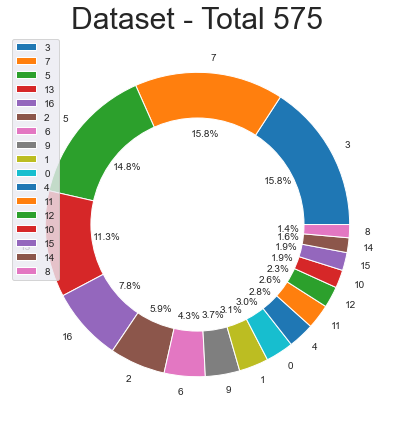

In [17]:
df_balanced = ProcessingData.balancedData(df, 'LABELS', 91)

<h2>TRATAMENTO DOS DADOS:</h2>
<li>Retirar Contato - ex: Telefone ou contato adicional: 61) 2028 5346 Tel: +55 (11)5585-6267
Fax: +55 (11)2275-3698
<li>Limpeza de acentos, pontuação, barras, etc ...
<li>Remoção de StopWords
<li>Transformação das palavras na sua raiz
<li>Adicionar tag de negação

In [18]:
def removeContact(string):
    return  string.lower().split('telefone ou')[0]

def formatStringsTestNeg(string):
    string = removeContact(string)
    string = proce_text.preprocessingFullNeg(string)
    return string

def formatStringsTest(string):
    string = removeContact(string)
    string = proce_text.preprocessingFull(string)
    return string

In [19]:
df_filtred = ProcessingData.applyFunction(df_balanced, 'DESCRIÇÃO', formatStringsTest)
df_filtred.DESCRIÇÃO

818    cliente não recordar senha acesso portal preen...
836            solicitação acesso usuario senha banco sa
151    software descrição cliente informar dificuldad...
362    software papercut descrição usuário mustafaqua...
362    software papercut descrição usuário mustafaqua...
                             ...                        
310    software safecom descrição supervisor solicita...
756    software papercut descrição cliente informar a...
755    software papercut descrição cliente informar a...
334    software descrição cliente relatar localidade ...
606    solicitação consulto time hp sobrar printnight...
Name: DESCRIÇÃO, Length: 575, dtype: object

<h2>Criação do Dataset treino e Dataset teste<h2>

In [20]:
sentences = df_filtred.DESCRIÇÃO.to_list()
labels = df_filtred.LABELS.to_list()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=.2, random_state=0, stratify=labels)

<h2>FORMATAÇÃO DOS DADOS PARA REDE NEURAL:</h2>
<li>Tokenize


In [22]:
vocab_size = 2000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [73]:
def pad(data):
    max_length = 300
    trunc_type='post'
    padding_type='post'
    'creating training sequences and padding them'
    data_sequences = tokenizer.texts_to_sequences(data)
    data_padded = pad_sequences(data_sequences, maxlen = max_length,
                                    padding = padding_type,
                                    truncating=trunc_type,
                                    )
    return data_padded

training_padded = pad(X_train)
testing_padded = pad(X_test)

In [24]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [25]:
embedding_dim = 16

model  = tf.keras.Sequential([
                #addinging an Embedding layer for Neural Network to learn the vectors'
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                tf.keras.layers.GlobalAveragePooling1D(),
                tf.keras.layers.Dense(24, activation = 'relu'),
                tf.keras.layers.Dense(21, activation = 'softmax')
])

# callbacks = [EarlyStopping(monitor='val_accuracy', patience=20),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])#, callbacks=callbacks,)

<h4>sparse_categorical_crossentropy</h4>
Uma possível causa de frustração ao usar entropia cruzada com problemas de classificação com um grande número de rótulos é o processo de codificação a quente.

Por exemplo, prever palavras em um vocabulário pode ter dezenas ou centenas de milhares de categorias, uma para cada rótulo. Isso pode significar que o elemento de destino de cada exemplo de treinamento pode exigir um vetor codificado a quente com dezenas ou centenas de milhares de valores zero, exigindo memória significativa.

A entropia cruzada esparsa aborda isso executando o mesmo cálculo de erro de entropia cruzada, sem exigir que a variável de destino seja uma codificada a quente antes do treinamento.

In [32]:
history = model.fit(training_padded, training_labels, epochs = 430,
                    validation_data = (testing_padded, testing_labels))

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5440 - accuracy: 0.8826 - val_loss: 1.9168 - val_accuracy: 0.5826
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5438 - accuracy: 0.8891 - val_loss: 1.9187 - val_accuracy: 0.5739
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5386 - accuracy: 0.8848 - val_loss: 1.9139 - val_accuracy: 0.5826
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5371 - accuracy: 0.8935 - val_loss: 1.9149 - val_accuracy: 0.5739
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.8848 - val_loss: 1.9191 - val_accuracy: 0.5739
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5313 - accuracy: 0.8935 - val_loss: 1.9184 - val_accuracy: 0.5826
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5287 - accuracy: 0.8935 - val_loss: 1.9275 - val_accuracy: 0.5826
Epoch 8/100
1

In [87]:
def find_class(probl, encoder):
    probl_max = probl.max()
    label = int(np.where(probl == probl_max)[0])

    return label, encoder.inverse_transform([label]), round(probl_max*100,1)

In [68]:
def plot_confusion_matrix(y_test, y_pred, labels, normalize=False):
    cm = confusion_matrix(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)#, figsize=(12,6))
    plt.gcf().set_size_inches(17, 11)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [70]:
def evaluate_model(model, history, X_test, y_test):
    scores = model.evaluate((X_test), y_test, verbose=0)
    print('=========================================')
    print("|| Accuracy: %.2f%%" % (scores[1]*100))
    print('=========================================')

    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title("Accuracy")
    axs[0].legend(['Training', 'Validation'])
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title("Model- Loss")
    axs[1].legend(['Training', 'Validation'])
    fig.tight_layout()

|| Accuracy: 61.74%


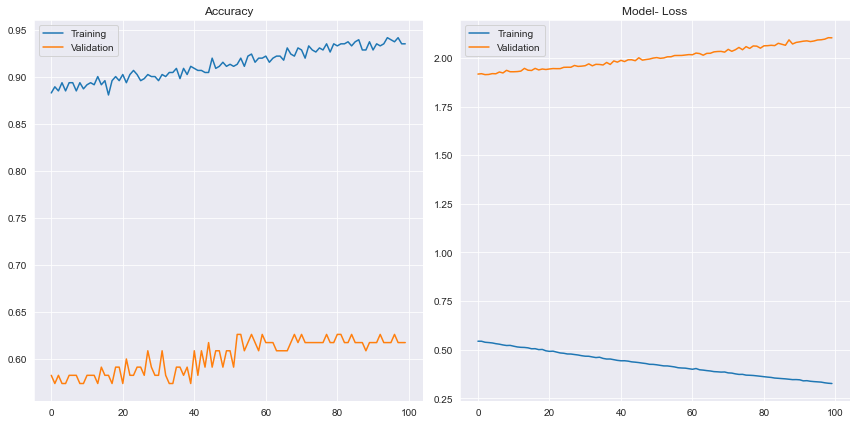

In [71]:
evaluate_model(model, history, testing_padded, testing_labels)

Normalized confusion matrix


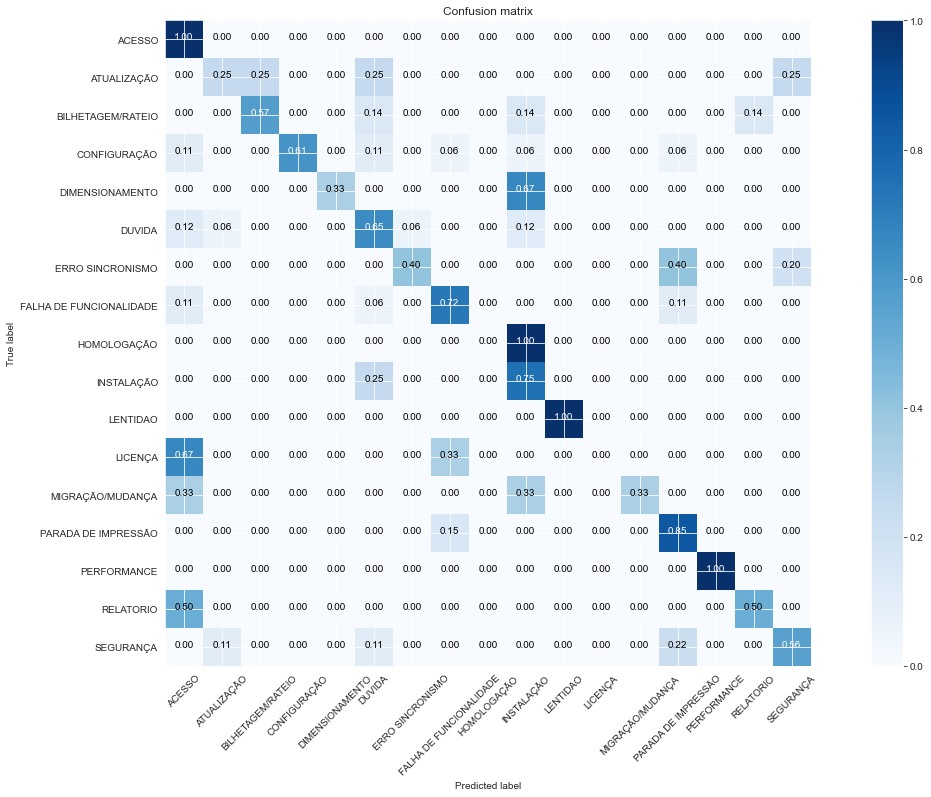

In [69]:
prediction_proba = model.predict(testing_padded)
prediction_cat = [find_class(c, df_encoder)[0] for c in prediction_proba]

plot_confusion_matrix(testing_labels, prediction_cat, df_encoder.classes_, True)

In [90]:
for c in range(0, 10):
    cat, name, prob = find_class(prediction_proba[c], df_encoder)
    print(f'Previsão: {name[0]} | Confiança: {prob}% | Certo: {df_encoder.inverse_transform([testing_labels[c]])[0]}')

Previsão: SEGURANÇA | Confiança: 96.4% | Certo: SEGURANÇA
Previsão: DUVIDA | Confiança: 61.4% | Certo: DUVIDA
Previsão: CONFIGURAÇÃO | Confiança: 98.3% | Certo: CONFIGURAÇÃO
Previsão: FALHA DE FUNCIONALIDADE | Confiança: 97.6% | Certo: FALHA DE FUNCIONALIDADE
Previsão: FALHA DE FUNCIONALIDADE | Confiança: 99.5% | Certo: FALHA DE FUNCIONALIDADE
Previsão: PARADA DE IMPRESSÃO | Confiança: 28.0% | Certo: SEGURANÇA
Previsão: ERRO SINCRONISMO | Confiança: 36.1% | Certo: DUVIDA
Previsão: FALHA DE FUNCIONALIDADE | Confiança: 89.0% | Certo: LICENÇA
Previsão: FALHA DE FUNCIONALIDADE | Confiança: 74.1% | Certo: PARADA DE IMPRESSÃO
Previsão: PARADA DE IMPRESSÃO | Confiança: 39.4% | Certo: PARADA DE IMPRESSÃO


<h2>Predição de Novas frases

In [91]:
def PredictModel(sentense):
    sentense = formatStringsTest(sentense)
    sentense = pad(sentense)
    new_padded = np.array(sentense)
    label, cat, probl = find_class(model.predict(new_padded)[0], df_encoder)
    print(f'Classificação de {cat} com {probl}')

In [92]:
sentence = '''

Software: Papercut Descrição: Cliente solicita apoio para extrair relatório de impressão mensal .
Telefone ou contato adicional: sem mais.

'''




PredictModel(sentence)

Classificação de ['INSTALAÇÃO'] com 28.0
